Import Lib

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import plotly.express as px
import re
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import joblib

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
# df : dataframe
df1 = pd.read_excel('/content/histopatologi_v1.xlsx')
df1

,NO.,TANGGAL,NO. ORDER,NAMA PASIEN,NO RM CA,TGL LAHIR,UMUR,JENIS KELAMIN,RUANGAN,HASIL CEA,HISTOPATOLOGI,HISTOPATOLOGI.1,Grade,UKURAN,GOLONGAN,Stadium patologi menggunakan sistem Dukes
0,105.0,2023-01-25 00:00:00,2301250095,Diono,1207414.0,1961-05-13 00:00:00,63Th,Laki-Laki,POLI PENYAKIT DALAM,2.39,Adenocarsinoma Recti,"Adenokarsinoma Kolorektal (Konvensional, NOS -...",grade 2,"17x15x1,5 cm",pT2N0Mx,A
1,131.0,2023-02-01 00:00:00,2302010078,Fitriah,1307503.0,1976-09-24 00:00:00,48Th,Perempuan,POLI BEDAH,474.4,"Adenocarcinoma, s errated type, moderately dif...",Adenokarsinoma Medullary.,grade 2,"8,5x7x2 cm",pT4bN2bMx,C2
2,144.0,2023-02-03 00:00:00,2302030048,Margaretha Bandaso,1209306.0,1975-03-31 00:00:00,49Th,Perempuan,POLI BEDAH UMUM,11.34,"Adenocarcinoma, infiltratif ke tunika muskularis","Adenokarsinoma Kolorektal (Konvensional, NOS -...",grade 1,5x4x2cm,pT2NxMx.,A
3,148.0,2023-02-03 00:00:00,2302030073,Siswanto,1310626.0,1963-02-06 00:00:00,62Th,Laki-Laki,POLI PENYAKIT DALAM,8.25,Adenokarsinoma colon,"Adenokarsinoma Kolorektal (Konvensional, NOS -...",grade 2,5x4x3cm,pT3N1Mx,C1
4,157.0,2023-02-07 00:00:00,2302070020,Henny Lun,1310610.0,1963-05-25 00:00:00,61Th,Perempuan,POLI BEDAH UMUM,7.19,Adenocarcinoma colon well differentiated,"Adenokarsinoma Kolorektal (Konvensional, NOS -...",grade 1,5x4x1cm,pT3N1Mx,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1133.0,2023-03-10 00:00:00,2310030086,Suparmi,1167835.0,25/12/1972,52Th,Perempuan,POLI BEDAH TUMOR,2.68,"Adenocarcinoma, moderate differentiated.","Adenokarsinoma Kolorektal (Konvensional, NOS -...",grade 2,5x3x2cm,pT3N2Mx,C2
146,1955.0,20/03/2024,2403200048,Marsudianto,937874.0,1959-08-05 00:00:00,66Th,Laki-Laki,POLI BEDAH UMUM,360.5,"Adenokarsinoma rectosigmoid, NOS","Adenokarsinoma Kolorektal (Konvensional, NOS -...",grade 2,6x4x1cm,pT3N2Mx,C2
147,2259.0,20/05/2024,2405200351,Arwita,1944321.0,25/01/1975,50Th,Perempuan,ASTER,1.17,"Adenocarcinoma, NOS, Moderately Differentiated","Adenokarsinoma Kolorektal (Konvensional, NOS -...",grade 2,4x3x1cm,pT3NoMx,B
148,1870.0,2024-01-03 00:00:00,2403010075,Humisar Siburian,1941862.0,22/10/1966,58Th,Laki-Laki,POLI BEDAH UMUM,11.29,"Adenocarcinoma, NOS, well differentiated","Adenokarsinoma Kolorektal (Konvensional, NOS -...",grade 1,2x2x1cm,pT3N1Mx,C1


In [10]:
df1['Stadium patologi menggunakan sistem Dukes'] = df1['Stadium patologi menggunakan sistem Dukes'].astype(str).str.strip()
df1['Stadium patologi menggunakan sistem Dukes'].value_counts()

,count
Stadium patologi menggunakan sistem Dukes,
C1,54
B,39
C2,34
A,16
D,7


In [11]:
df1 = df1[df1['Stadium patologi menggunakan sistem Dukes'].isin(['C1', 'B'])]

Data

In [12]:
print("data shape : ", df1.shape)

data shape :  (93, 16)


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 3 to 149
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   NO.                                        91 non-null     float64
 1   TANGGAL                                    93 non-null     object 
 2   NO. ORDER                                  93 non-null     int64  
 3   NAMA PASIEN                                93 non-null     object 
 4   NO RM CA                                   93 non-null     float64
 5   TGL LAHIR                                  93 non-null     object 
 6   UMUR                                       93 non-null     object 
 7   JENIS KELAMIN                              93 non-null     object 
 8   RUANGAN                                    93 non-null     object 
 9   HASIL CEA                                  93 non-null     object 
 10  HISTOPATOLOGI                   

In [14]:
df1.describe()

,NO.,NO. ORDER,NO RM CA
count,91.000000,9.300000e+01,9.300000e+01
mean,1455.285714,2.175324e+09,1.247777e+06
std,813.882728,1.375646e+08,3.732581e+05
min,38.000000,2.001080e+09,5.244340e+05
25%,759.500000,2.102220e+09,1.073429e+06
50%,1513.000000,2.110190e+09,1.094763e+06
75%,2160.500000,2.305112e+09,1.203628e+06
max,3225.000000,2.411210e+09,1.970699e+06


Cleaning Data

In [15]:
def clean_hasil_cea(value):
    if pd.isna(value):
        return None
    value = str(value).strip()
    if '<' in value:
        return 0.49
    if '>' in value:
        return 200.0
    value = value.replace(',', '.')
    try:
        return float(value)
    except ValueError:
        return None

In [16]:
# Function to clean and calculate volume
def calculate_volume(ukuran):
    if pd.isna(ukuran):
        return None
    # Replace commas with dots
    ukuran = ukuran.replace(',', '.')
    # Remove "cm", spaces, etc.
    ukuran = ukuran.replace('cm', '').replace('CM', '').strip().lower()
    # Split by 'dan' if multiple measurements
    parts = ukuran.split('dan')
    volumes = []
    for part in parts:
        dims = re.findall(r"[\d.]+", part)
        if len(dims) == 3:
            try:
                # Clean each dimension: remove trailing dots if any
                dims = [dim.rstrip('.') for dim in dims]
                volume = float(dims[0]) * float(dims[1]) * float(dims[2])
                volumes.append(volume)
            except:
                return None
    if volumes:
        return sum(volumes) / len(volumes)  # Average if multiple
    else:
        return None

In [17]:
def clean_umur(value):
    if pd.isna(value):
        return None
    # Cari angka dari string
    numbers = re.findall(r'\d+', str(value))
    if numbers:
        return int(numbers[0])
    return None

In [18]:
# Apply ke kolom
df1['HASIL CEA'] = df1['HASIL CEA'].apply(clean_hasil_cea)
df1['HASIL CEA'] = df1['HASIL CEA'].fillna(0)

# Apply the function to your DataFrame
df1['VOLUME_UKURAN'] = df1['UKURAN'].apply(calculate_volume)

# Apply ke kolom UMUR
df1['UMUR '] = df1['UMUR '].apply(clean_umur)

/tmp/ipython-input-18-2464930302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['HASIL CEA'] = df1['HASIL CEA'].apply(clean_hasil_cea)
/tmp/ipython-input-18-2464930302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['HASIL CEA'] = df1['HASIL CEA'].fillna(0)
/tmp/ipython-input-18-2464930302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [19]:
# Fix the 'Grade' column values by standardizing the grade labels
df1['Grade '] = df1['Grade '].replace({
    'grade 1': 'grade 1',
    'grade 2': 'grade 2',
    'grade 3': 'grade 3',
    'grade  3': 'grade 3',
    'grade 2 ': 'grade 2',
    'grade1': 'grade 1'
})

/tmp/ipython-input-19-1900841361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grade '] = df1['Grade '].replace({


In [20]:
df1 = df1[['NAMA PASIEN', 'UMUR ', 'JENIS KELAMIN', 'HASIL CEA', 'HISTOPATOLOGI', 'Grade ', 'VOLUME_UKURAN', 'GOLONGAN ', 'Stadium patologi menggunakan sistem Dukes']]


In [22]:
# Drop rows where 'Stadium patologi menggunakan sistem Dukes' is NaN
df1 = df1.dropna(subset=['Stadium patologi menggunakan sistem Dukes']).reset_index(drop=True)

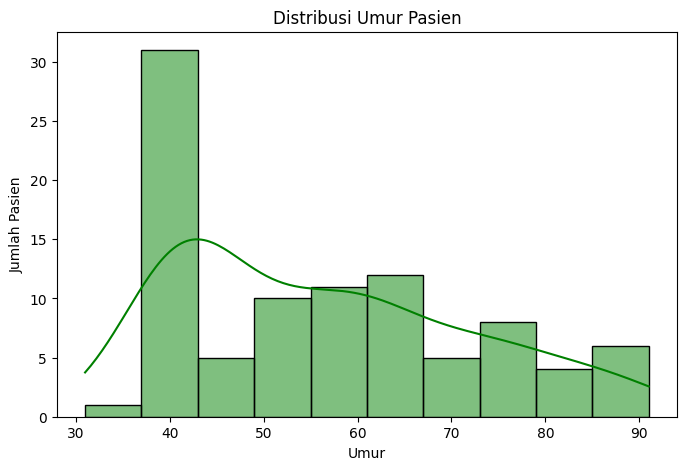

In [23]:
# Histogram untuk distribusi Umur
plt.figure(figsize=(8, 5))
sns.histplot(df1['UMUR '], kde=True, color='green', bins=10)
plt.title('Distribusi Umur Pasien')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pasien')
plt.show()

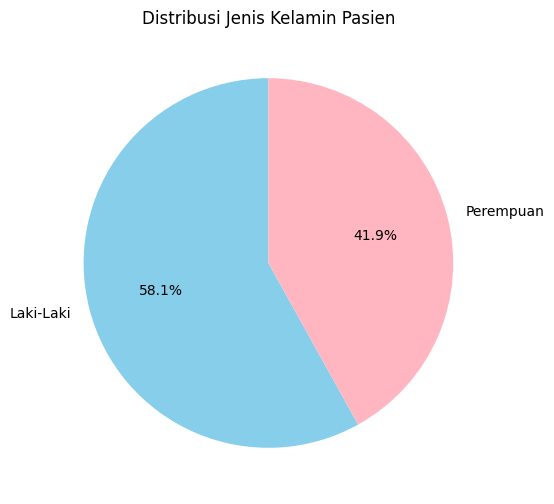

In [24]:
# Pie Chart untuk Jenis Kelamin
plt.figure(figsize=(6, 6))
df1['JENIS KELAMIN'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink'])
plt.title('Distribusi Jenis Kelamin Pasien')
plt.ylabel('')  # Menghilangkan label y
plt.show()

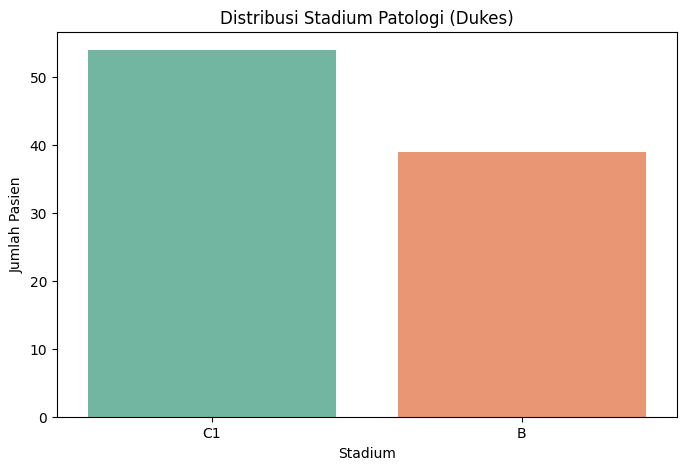

In [25]:
# Bar Chart untuk Stadium Patologi
plt.figure(figsize=(8, 5))
sns.countplot(x='Stadium patologi menggunakan sistem Dukes', data=df1, palette='Set2')
plt.title('Distribusi Stadium Patologi (Dukes)')
plt.xlabel('Stadium')
plt.ylabel('Jumlah Pasien')
plt.show()

Data Preparation

In [26]:
df1.head()

,NAMA PASIEN,UMUR,JENIS KELAMIN,HASIL CEA,HISTOPATOLOGI,Grade,VOLUME_UKURAN,GOLONGAN,Stadium patologi menggunakan sistem Dukes
0,Siswanto,62,Laki-Laki,8.25,Adenokarsinoma colon,grade 2,60.0,pT3N1Mx,C1
1,Henny Lun,61,Perempuan,7.19,Adenocarcinoma colon well differentiated,grade 1,20.0,pT3N1Mx,C1
2,Aimah,59,Perempuan,2.04,Adenocarcinoma rectum well differentiated,grade 1,30.0,pT3N1Mx,C1
3,Elvies Toding,62,Laki-Laki,3.40,"Colon sigmoid : Adenocarcinoma, moderate diffe...",grade 2,9.0,pT3N1aMx,C1
4,Sang Yang Bang,64,Laki-Laki,2.20,"Adenocarcinoma, moderately differentiated pada...",grade 2,25.0,pT3N1cMx,C1


In [27]:
# Drop rows where 'Stadium patologi menggunakan sistem Dukes' is NaN
df1 = df1.dropna(subset=['VOLUME_UKURAN']).reset_index(drop=True)
df1['JENIS KELAMIN'] = df1['JENIS KELAMIN'].map({'Laki-Laki': 1, 'Perempuan':0})
df1['Grade '] = df1['Grade '].map({'grade 1': 1, 'grade 2': 2, 'grade 3': 3})
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df1['Stadium patologi menggunakan sistem Dukes'] = label_encoder.fit_transform(df1['Stadium patologi menggunakan sistem Dukes'])
df1['HISTOPATOLOGI'] = label_encoder.fit_transform(df1['HISTOPATOLOGI'])

In [28]:
df1.head()

,NAMA PASIEN,UMUR,JENIS KELAMIN,HASIL CEA,HISTOPATOLOGI,Grade,VOLUME_UKURAN,GOLONGAN,Stadium patologi menggunakan sistem Dukes
0,Siswanto,62,1,8.25,21,2,60.0,pT3N1Mx,1
1,Henny Lun,61,0,7.19,3,1,20.0,pT3N1Mx,1
2,Aimah,59,0,2.04,8,1,30.0,pT3N1Mx,1
3,Elvies Toding,62,1,3.40,43,2,9.0,pT3N1aMx,1
4,Sang Yang Bang,64,1,2.20,18,2,25.0,pT3N1cMx,1


In [29]:
# Asumsi data sudah di-encode sebelumnya
X = df1[['UMUR ', 'JENIS KELAMIN', 'HASIL CEA', 'HISTOPATOLOGI', 'Grade ', 'VOLUME_UKURAN']]
y = df1['Stadium patologi menggunakan sistem Dukes']  # sudah encoded label
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
# Label classes
classes = np.unique(y)

Modeling

In [30]:
def evaluasi_model(y_true, y_pred, title=""):
    print(f"\n--- {title} ---")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

def plot_roc_curve_flexible(model, x_test, y_test, title):
    classes = np.unique(y_test)
    y_score = model.decision_function(x_test)

    plt.figure(figsize=(8, 6))

    if len(classes) == 2:
        # Binary classification case
        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc = roc_auc_score(y_test, y_score)
        plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    else:
        # Multi-class classification case
        y_test_bin = label_binarize(y_test, classes=classes)
        if y_score.ndim == 1:
            raise ValueError("Expected 2D scores for multi-class classification")
        for i in range(len(classes)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
            plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

In [31]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    'max_iter': [5000],
    'class_weight': [None, 'balanced']
}


--- A. No SMOTE, No Tuning ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      1.00      0.75         6

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.36      0.60      0.45        10



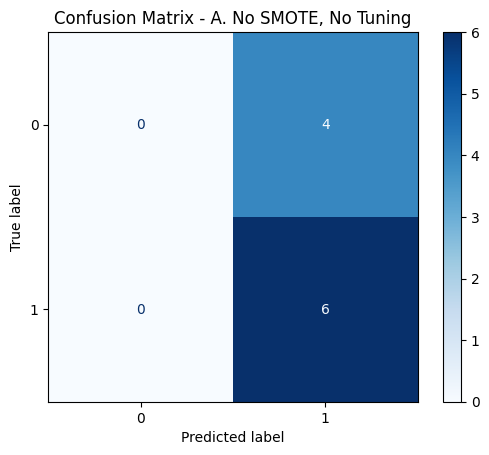

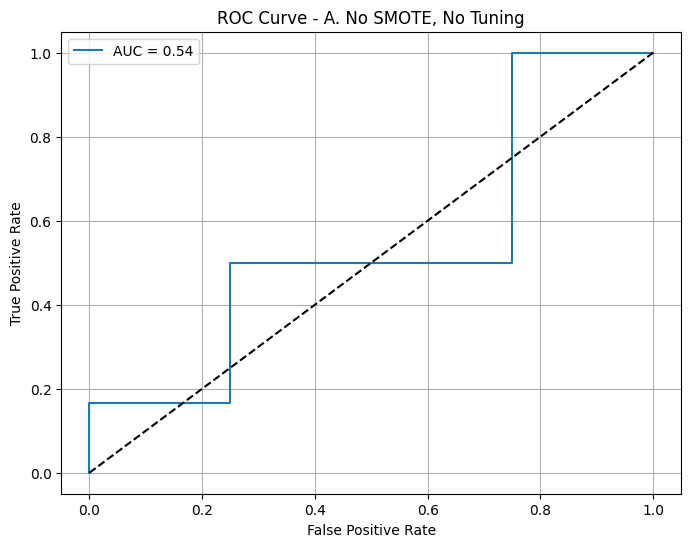

Akurasi A: 60.0%


In [32]:
model_a = SVC(probability=False)
model_a.fit(x_train, y_train)
y_pred_a = model_a.predict(x_test)
evaluasi_model(y_test, y_pred_a, "A. No SMOTE, No Tuning")
plot_roc_curve_flexible(model_a, x_test, y_test, "A. No SMOTE, No Tuning")
print(f"Akurasi A: {round(accuracy_score(y_test, y_pred_a)*100, 2)}%")

Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- B. No SMOTE, GridSearchCV ---
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.62      0.83      0.71         6

    accuracy                           0.60        10
   macro avg       0.56      0.54      0.52        10
weighted avg       0.57      0.60      0.56        10



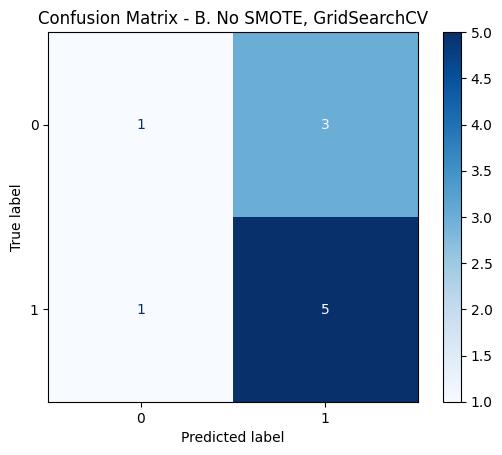

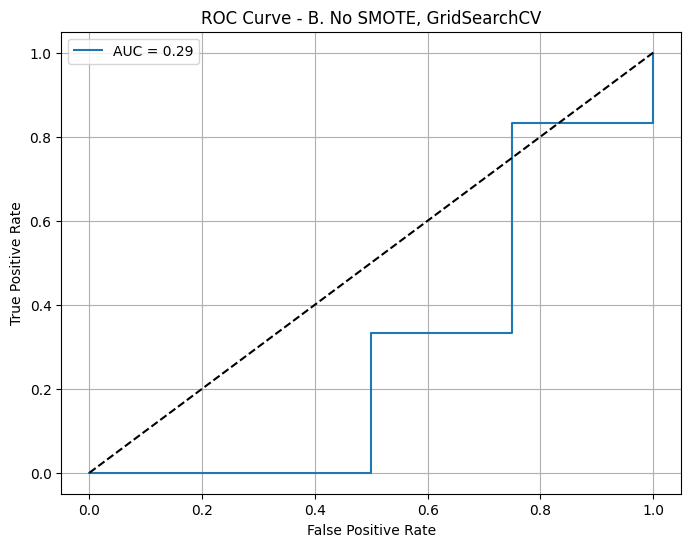

Akurasi B: 60.0%
Best Params B: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 5000}


In [33]:
model_b = GridSearchCV(SVC(), param_grid=param_grid_svm, cv=5, verbose=1)
model_b.fit(x_train, y_train)
y_pred_b = model_b.predict(x_test)
evaluasi_model(y_test, y_pred_b, "B. No SMOTE, GridSearchCV")
plot_roc_curve_flexible(model_b, x_test, y_test, "B. No SMOTE, GridSearchCV")
print(f"Akurasi B: {round(accuracy_score(y_test, y_pred_b)*100, 2)}%")
print("Best Params B:", model_b.best_params_)


--- C. SMOTE, No Tuning ---
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.50      0.67         6

    accuracy                           0.70        10
   macro avg       0.79      0.75      0.70        10
weighted avg       0.83      0.70      0.69        10



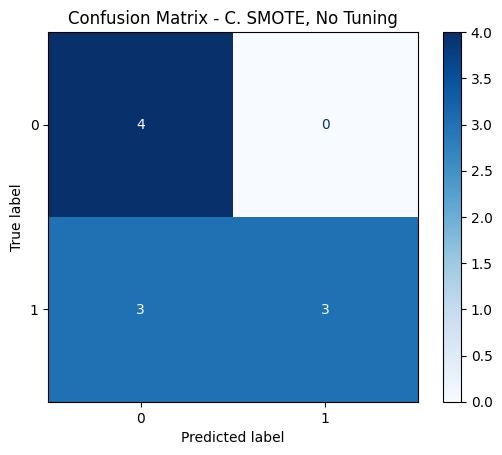

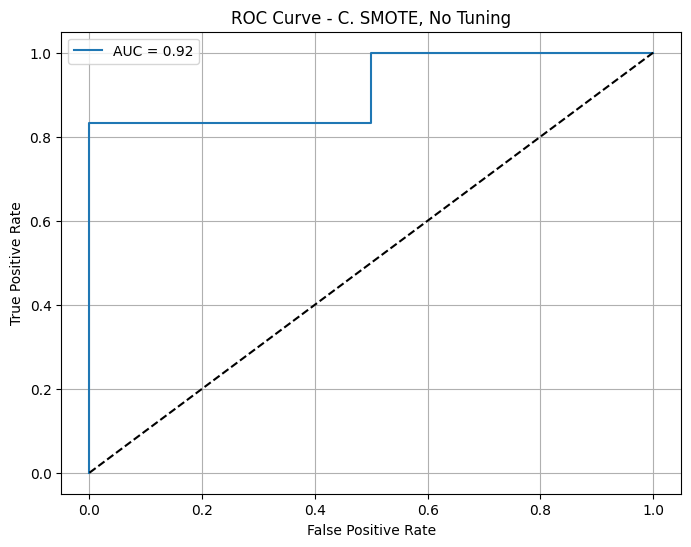

Akurasi C: 70.0%


In [34]:
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

model_c = SVC(probability=False)
model_c.fit(x_train_sm, y_train_sm)
y_pred_c = model_c.predict(x_test)
evaluasi_model(y_test, y_pred_c, "C. SMOTE, No Tuning")
plot_roc_curve_flexible(model_c, x_test, y_test, "C. SMOTE, No Tuning")
print(f"Akurasi C: {round(accuracy_score(y_test, y_pred_c)*100, 2)}%")

Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- D. SMOTE, GridSearchCV ---
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.62      0.83      0.71         6

    accuracy                           0.60        10
   macro avg       0.56      0.54      0.52        10
weighted avg       0.57      0.60      0.56        10



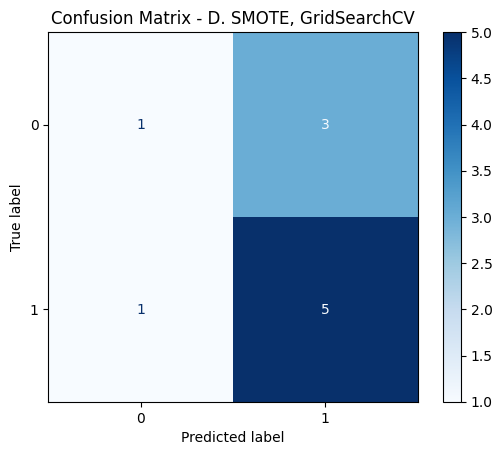

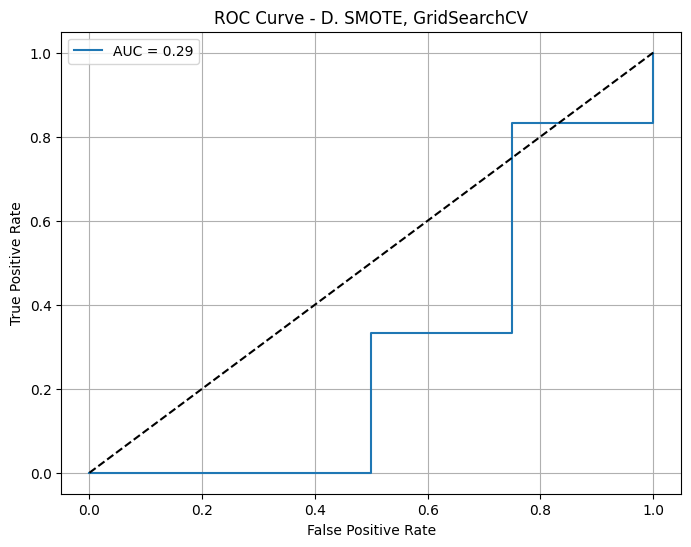

Akurasi D: 60.0%
Best Params D: {'C': 10, 'class_weight': None, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 5000}


In [35]:
model_d = GridSearchCV(SVC(), param_grid=param_grid_svm, cv=5, verbose=1)
model_d.fit(x_train_sm, y_train_sm)
y_pred_d = model_d.predict(x_test)
evaluasi_model(y_test, y_pred_d, "D. SMOTE, GridSearchCV")
plot_roc_curve_flexible(model_d, x_test, y_test, "D. SMOTE, GridSearchCV")
print(f"Akurasi D: {round(accuracy_score(y_test, y_pred_d)*100, 2)}%")
print("Best Params D:", model_d.best_params_)

Testing

In [36]:
import pandas as pd

# Buat data uji (testing data)
testing_data = {
    'UMUR ': [42, 21, 60, 35, 53],
    'JENIS KELAMIN': [1, 1, 0, 0, 1], # 0 = Perempuan, 1 = Laki-laki
    'HASIL CEA': [3.00, 30, 7.19, 6.00, 474.30],
    'HISTOPATOLOGI': [0, 1, 2, 3, 4],
    'Grade ': [1, 2, 3, 0, 1],
    'VOLUME_UKURAN': [40.0, 250, 157, 12.0, 382.5]
}

# Konversi ke DataFrame
testing = pd.DataFrame(testing_data)
testing

,UMUR,JENIS KELAMIN,HASIL CEA,HISTOPATOLOGI,Grade,VOLUME_UKURAN
0,42,1,3.00,0,1,40.0
1,21,1,30.00,1,2,250.0
2,60,0,7.19,2,3,157.0
3,35,0,6.00,3,0,12.0
4,53,1,474.30,4,1,382.5


In [37]:
pred_a = model_a.predict(testing)
pred_b = model_b.predict(testing)
pred_c = model_c.predict(testing)
pred_d = model_d.predict(testing)

pred_a_label = label_encoder.inverse_transform(pred_a)
pred_b_label = label_encoder.inverse_transform(pred_b)
pred_c_label = label_encoder.inverse_transform(pred_c)
pred_d_label = label_encoder.inverse_transform(pred_d)

hasil_prediksi = testing.copy()
hasil_prediksi["Model A (No SMOTE, No Tuning)"] = pred_a_label
hasil_prediksi["Model B (With SMOTE, No Tuning)"] = pred_b_label
hasil_prediksi["Model C (No SMOTE, GridSearch)"] = pred_c_label
hasil_prediksi["Model D (With SMOTE, GridSearch)"] = pred_d_label

hasil_prediksi

,UMUR,JENIS KELAMIN,HASIL CEA,HISTOPATOLOGI,Grade,VOLUME_UKURAN,"Model A (No SMOTE, No Tuning)","Model B (With SMOTE, No Tuning)","Model C (No SMOTE, GridSearch)","Model D (With SMOTE, GridSearch)"
0,42,1,3.00,0,1,40.0,Adenocarcinoma,Adenocarcinoma,Adenocarcinoma,Adenocarcinoma
1,21,1,30.00,1,2,250.0,Adenocarcinoma,Adenocarcinoma,Adenocarcinoma,Adenocarcinoma
2,60,0,7.19,2,3,157.0,Adenocarcinoma,Adenocarcinoma,Adenocarcinoma,Adenocarcinoma
3,35,0,6.00,3,0,12.0,Adenocarcinoma,Adenocarcinoma,Adenocarcinoma,Adenocarcinoma
4,53,1,474.30,4,1,382.5,Adenocarcinoma,Adenocarcinoma,Adenocarcinoma,Adenocarcinoma
